In [95]:
import numpy as np
import random as rd
from matplotlib import pyplot as plt

In [96]:
N = 10
r = 0.1
dt = 0.01
T = 4

In [97]:
def rand_init(N):
    bodies = np.zeros((N, 4))
    for i in range(N):
        for j in range(4):
            bodies[i, j] = rd.random()
    bodies[:, :] *= 10.
    return bodies

In [98]:
#bodies = np.array([[1, 1, 5, 5], [5, 1, -5, 5], [9, 1, 0, -1]], dtype = float)
bodies = rand_init(N)

In [99]:
def wall_collision(body):
    if body[0] <= r or body[0] >= 10. - r:
        body[2] *= -1.
    if body[1] <= r or body[1] >= 10. - r:
        body[3] *= -1.
    return body

In [100]:
def collision(body1, body2):
    
    tan = abs(body1[1]-body2[1]) / abs(body1[0]-body2[0])
    alpha = np.arctan(tan)
    
    vel1_x_init = body1[2]
    vel2_x_init = body2[2]
    vel1_y_init = body1[3]
    vel2_y_init = body2[3]
    
    vel1_x_new = -vel1_y_init * np.sin(alpha) + vel1_x_init * np.cos(alpha) 
    vel2_x_new = -vel2_y_init * np.sin(alpha) + vel2_x_init * np.cos(alpha) 
    vel1_y_new = vel1_y_init * np.cos(alpha) + vel1_x_init * np.sin(alpha) 
    vel2_y_new = vel2_y_init * np.cos(alpha) + vel2_x_init * np.sin(alpha) 

    vel1_x_new_comm = vel2_x_new
    vel2_x_new_comm = vel1_x_new 
    vel1_y_new_comm = vel1_y_new 
    vel2_y_new_comm = vel2_y_new 
    
    vel1_x_init_comm = vel1_y_new_comm * np.sin(alpha) + vel1_x_new_comm * np.cos(alpha)
    vel2_x_init_comm = vel2_y_new_comm * np.sin(alpha) + vel2_x_new_comm * np.cos(alpha)
    vel1_y_init_comm = vel1_y_new_comm * np.cos(alpha) - vel1_x_new_comm * np.sin(alpha)
    vel2_y_init_comm = vel2_y_new_comm * np.cos(alpha) - vel2_x_new_comm * np.sin(alpha)
    
    body1[2] = vel1_x_init_comm
    body1[3] = vel1_y_init_comm
    body2[2] = vel2_x_init_comm
    body2[3] = vel2_y_init_comm
    
    return body1, body2

In [101]:
def move(body, dt):
    body[0] += body[2] * dt
    body[1] += body[3] * dt
    return body

In [102]:
def all_collisions(bodies):
    def dist(body1, body2):
        return np.sqrt((body2[0] - body1[0]) ** 2 + (body2[1] - body1[1]) ** 2)
    for i in range(N):
        for j in range(i):
            if dist(bodies[i], bodies[j]) <= r:
                bodies[i], bodies[j] = collision(bodies[i].copy(), bodies[j].copy())
    return bodies

In [103]:
t = 0
coords = np.zeros((N, int(T / dt), 2))
for t in range(int(T / dt)):
    for i in range(N):
        bodies[i, :] = wall_collision(bodies[i, :].copy())
        bodies = all_collisions(bodies.copy())
        bodies[i, :] = move(bodies[i, :].copy(), dt)
    coords[:, t, :] = bodies[:, :2]

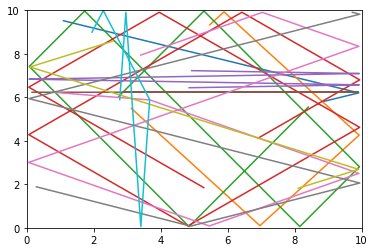

In [104]:
plt.xlim([0, 10])
plt.ylim([0, 10])
for i in range(N):
    plt.plot(coords[i, :, 0], coords[i, :, 1])